# Analyzing Covid Data

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading Data

In [2]:
d=pd.read_csv("covid.csv")

# Display Data

In [3]:
d

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              18327 non-null  object 
 1   ObservationDate  17360 non-null  object 
 2   Province/State   8091 non-null   object 
 3   Country/Region   17360 non-null  object 
 4   Last Update      17360 non-null  object 
 5   Confirmed        17360 non-null  float64
 6   Deaths           17360 non-null  float64
 7   Recovered        17360 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.1+ MB


In [5]:
d.shape

(18327, 8)

# Sample Data

In [6]:
d.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15338,15339,04/15/2020,French Polynesia,France,2020-04-15 23:04:26,55.0,0.0,0.0
7377,7378,03/21/2020,NaN,Slovenia,2020-03-21T14:43:03,383.0,1.0,0.0
10318,10319,03/30/2020,Quebec,Canada,3/8/20 5:31,3430.0,22.0,0.0
15966,15967,04/17/2020,Channel Islands,UK,2020-04-17 23:38:48,470.0,20.0,73.0
4128,"4129,03/08/2020,""Edmonton, Alberta"",Canada,202...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
d.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [8]:
d.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18317,18318,04/24/2020,Virginia,US,2020-04-25 06:31:19,11594.0,411.0,0.0
18318,18319,04/24/2020,Washington,US,2020-04-25 06:31:19,12977.0,722.0,0.0
18319,18320,04/24/2020,West Virginia,US,2020-04-25 06:31:19,1010.0,32.0,0.0
18320,18321,04/24/2020,Western Australia,Australia,2020-04-25 06:31:19,548.0,8.0,340.0
18321,18322,04/24/2020,Wisconsin,US,2020-04-25 06:31:19,5356.0,263.0,0.0
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0
18326,18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0


In [9]:
d.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [10]:
d.dtypes

SNo                 object
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [11]:
d["Deaths"].value_counts()

0.0        7159
1.0        1909
2.0        1035
3.0         791
6.0         582
           ... 
16606.0       1
887.0         1
1101.0        1
9875.0        1
722.0         1
Name: Deaths, Length: 1070, dtype: int64

In [12]:
n=d.groupby("Country/Region").Deaths.sum().sort_values(ascending=False)
n

Country/Region
US                                631393.0
Italy                             597687.0
Spain                             460470.0
France                            367150.0
UK                                270200.0
                                    ...   
Mayotte                                0.0
Maldives                               0.0
Madagascar                             0.0
Macau                                  0.0
occupied Palestinian territory         0.0
Name: Deaths, Length: 217, dtype: float64

In [13]:
d.max

<bound method NDFrame._add_numeric_operations.<locals>.max of          SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
18322  18323      04/24/2020        Wyoming              US   
18323  18324      04/24/2020       Xinjiang  Mainland China   
18324  18325      04/24/2020          Yukon          Canada   
18325  18326      04/24/2020         Yunnan  Mainland China   
18326  18327      04/24/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2   

In [14]:
d.min()

C:\Users\46730\AppData\Local\Temp/ipykernel_5248/511678694.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.min()


SNo            1
Confirmed    0.0
Deaths       0.0
Recovered    0.0
dtype: object

# Data Cleaning

In [15]:
d=pd.read_csv("covid.csv",index_col=0)

In [16]:
d

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


# To check the number of rows and columns

In [17]:
d.shape

(18327, 7)

# To print names of fields

In [18]:
d.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

# Description of the data

In [19]:
d.describe()

,Confirmed,Deaths,Recovered
count,17360.000000,17360.000000,17360.000000
mean,3198.628629,190.738364,807.116878
std,15527.416890,1398.839123,5770.058389
min,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000
50%,125.000000,1.000000,2.000000
75%,756.000000,9.000000,78.000000
max,271590.000000,25969.000000,109800.000000


In [20]:
d.describe(include='all')  # describing the whole data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
count,17360,8091,17360,17360,17360.000000,17360.000000,17360.000000
unique,94,157,217,1694,NaN,NaN,NaN
top,04/10/2020,Diamond Princess cruise ship,Mainland China,3/8/20 5:31,NaN,NaN,NaN
freq,320,125,2912,1232,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3198.628629,190.738364,807.116878
std,NaN,NaN,NaN,NaN,15527.416890,1398.839123,5770.058389
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,13.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,125.000000,1.000000,2.000000
75%,NaN,NaN,NaN,NaN,756.000000,9.000000,78.000000


In [21]:
d.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.899801,0.659748
Deaths,0.899801,1.000000,0.564507
Recovered,0.659748,0.564507,1.000000


# Checking for null values

In [22]:
d.isnull() # or d.isna()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
18323,False,False,False,False,False,False,False
18324,False,False,False,False,False,False,False
18325,False,False,False,False,False,False,False


In [23]:
d.isnull().sum()

ObservationDate      967
Province/State     10236
Country/Region       967
Last Update          967
Confirmed            967
Deaths               967
Recovered            967
dtype: int64

In [24]:
d.isnull().sum().sum()

16038

In [25]:
d.sort_values(by="ObservationDate")

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
22,01/22/2020,Ningxia,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
23,01/22/2020,Qinghai,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
24,01/22/2020,Shaanxi,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
25,01/22/2020,Shandong,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
...,...,...,...,...,...,...,...
"16922,04/20/2020,""Bonaire, Sint Eustatius and Saba"",Netherlands,2020-04-20 23:44:50,5.0,0.0,0.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"17242,04/21/2020,""Bonaire, Sint Eustatius and Saba"",Netherlands,2020-04-21 23:39:09,5.0,0.0,0.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"17562,04/22/2020,""Bonaire, Sint Eustatius and Saba"",Netherlands,2020-04-22 23:38:57,5.0,0.0,0.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rename the Country/Region

In [26]:
d.rename(columns={'Country/Region':'Country'},inplace=True)

In [27]:
d

,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


In [28]:
d.duplicated()

SNo
1        False
2        False
3        False
4        False
5        False
         ...  
18323    False
18324    False
18325    False
18326    False
18327    False
Length: 18327, dtype: bool

In [29]:
d.duplicated().sum()

966

In [30]:
d=d.drop_duplicates()

In [31]:
d

,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


In [32]:
d.duplicated().sum()

0

In [33]:
d.sort_values(by='ObservationDate',ascending=False)

,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0
18117,04/24/2020,NaN,Moldova,2020-04-25 06:31:19,3110.0,84.0,755.0
18110,04/24/2020,NaN,Malaysia,2020-04-25 06:31:19,5691.0,96.0,3663.0
18111,04/24/2020,NaN,Maldives,2020-04-25 06:31:19,129.0,0.0,16.0
18112,04/24/2020,NaN,Mali,2020-04-25 06:31:19,325.0,21.0,87.0
...,...,...,...,...,...,...,...
25,01/22/2020,Shandong,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
24,01/22/2020,Shaanxi,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
23,01/22/2020,Qinghai,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Counting the number of countries

In [34]:
d['Country'].value_counts()

Mainland China         2912
US                     2687
Canada                  645
Australia               588
France                  477
                       ... 
 Azerbaijan               1
North Ireland             1
Republic of Ireland       1
East Timor                1
Cape Verde                1
Name: Country, Length: 217, dtype: int64

# Country with maximum or minimum entries

In [35]:
d['Country'].value_counts().max()

2912

In [36]:
d['Country'].value_counts().min()

1

In [37]:
d['Deaths'].value_counts().max()

7159

In [38]:
d['Country'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', nan, 'Spain', 'Belgium', 'Others',
       'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria',
       'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece',
       'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia',
       'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland',
       'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'Andorra', 'L

# Creating a copy of the data

In [39]:
d1=d.copy()  #original will not be affected this way

In [40]:
d1

,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


In [41]:
n=d.groupby('Country').Deaths.sum().sort_values(ascending=False) # country wise-sum of the deaths is sorted..to identify which country has max deaths

In [42]:
n

Country
US                                631393.0
Italy                             597687.0
Spain                             460470.0
France                            367150.0
UK                                270200.0
                                    ...   
Mayotte                                0.0
Maldives                               0.0
Madagascar                             0.0
Macau                                  0.0
occupied Palestinian territory         0.0
Name: Deaths, Length: 217, dtype: float64

In [43]:
n=d.groupby('Country').Confirmed.sum().sort_values(ascending=False)

In [44]:
n

Country
US                       14589530.0
Mainland China            6148522.0
Italy                     4936614.0
Spain                     4735954.0
Germany                   3574181.0
                            ...    
North Ireland                   1.0
Republic of the Congo           1.0
Cape Verde                      1.0
The Gambia                      1.0
 Azerbaijan                     1.0
Name: Confirmed, Length: 217, dtype: float64

# Data Visualisation

In [45]:
d

,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


In [46]:
d.sample(50)

,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
9920,03/29/2020,British Virgin Islands,UK,3/8/20 5:31,2.0,0.0,0.0
10764,04/01/2020,NaN,Libya,2020-04-01 22:04:58,10.0,0.0,0.0
15254,04/15/2020,NaN,Pakistan,2020-04-15 23:04:26,6383.0,111.0,1446.0
8385,03/24/2020,Bermuda,UK,2020-03-24 23:41:50,6.0,0.0,0.0
5704,03/15/2020,NaN,Lebanon,2020-03-15T18:20:18,110.0,3.0,1.0
11613,04/04/2020,NaN,Afghanistan,4/4/20 9:38,299.0,7.0,10.0
7564,03/21/2020,NaN,Madagascar,2020-03-20T22:13:53,3.0,0.0,0.0
17333,04/21/2020,Recovered,Canada,2020-04-21 23:39:09,0.0,0.0,13188.0
6986,03/19/2020,NaN,Djibouti,2020-03-19T14:53:06,1.0,0.0,0.0


In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns

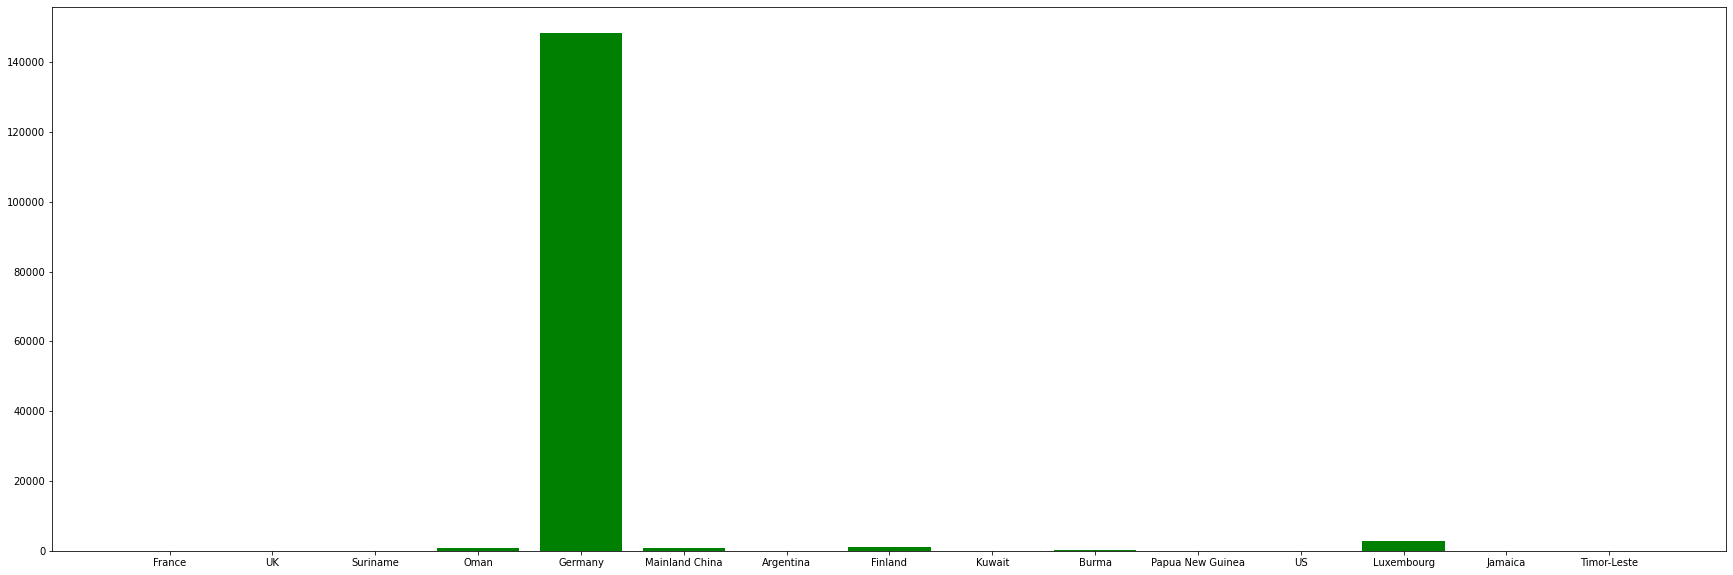

In [48]:
d1=d.sample(20)
plt.figure(figsize=(30,10))
plt.bar('Country','Confirmed',data=d1,color='green')  # taking the country and confirmed cases and plotting bar diagram
plt.show()

### grouping cases as per the date

In [49]:
date_wise=d.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

In [50]:
date_wise.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0


### Total number of confirmed cases around the world

In [51]:
date_wise['Confirmed'].iloc[-1]

2811188.0

### Total number of active cases

In [52]:
date_wise['Confirmed'].iloc[-1]-date_wise['Deaths'].iloc[-1]-date_wise['Recovered'].iloc[-1]

1820428.0

In [53]:
date_wise['Deaths'].iloc[-1]+date_wise['Recovered'].iloc[-1]

990760.0

In [54]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

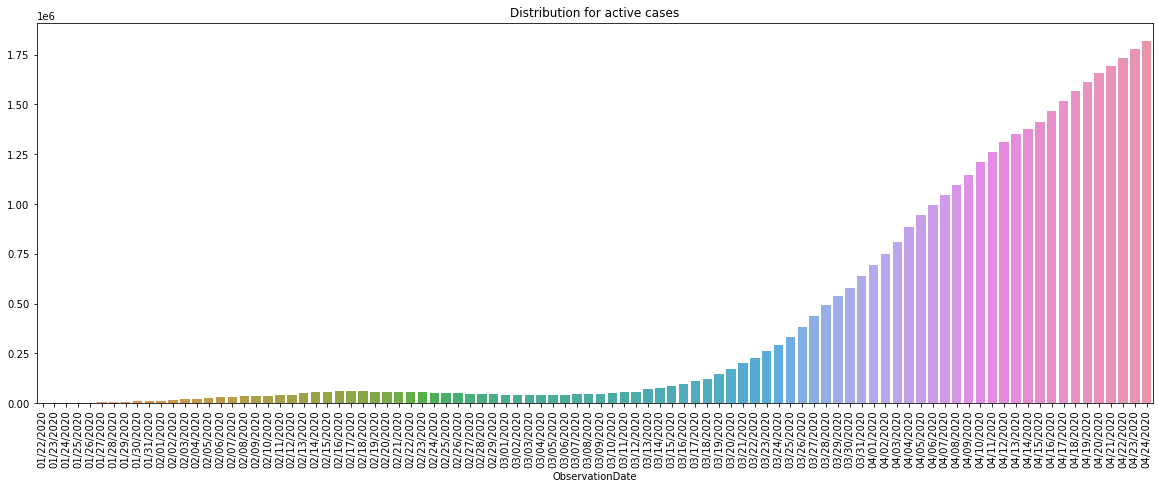

In [55]:
plt.figure(figsize=(20,7))
sns.barplot(x=date_wise.index,y=date_wise['Confirmed']-date_wise['Recovered']-date_wise['Deaths'])
plt.xticks(rotation=90)
plt.title('Distribution for active cases')
plt.show()

## Subplot

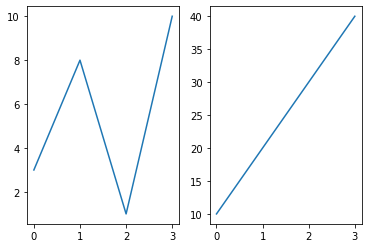

In [59]:
x=np.array([0,1,2,3])
y=np.array([3,8,1,10])

plt.subplot(1,2,1)
plt.plot(x,y)

x=np.array([0,1,2,3])
y=np.array([10,20,30,40])

plt.subplot(1,2,2)
plt.plot(x,y)

plt.show()

